# Desafio: Analisar Texto sobre Ciência de Dados

Neste exemplo, vamos realizar um exercício simples que abrange todas as etapas de um processo tradicional de ciência de dados. Não é necessário escrever qualquer código, basta clicar nas células abaixo para executá-las e observar o resultado. Como desafio, é incentivado que experimente este código com dados diferentes.

## Objetivo

Nesta lição, discutimos diferentes conceitos relacionados à Ciência de Dados. Vamos tentar descobrir mais conceitos relacionados através de **mineração de texto**. Começaremos com um texto sobre Ciência de Dados, extrairemos palavras-chave dele e, em seguida, tentaremos visualizar o resultado.

Como texto, utilizarei a página sobre Ciência de Dados da Wikipedia:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## Passo 1: Obter os Dados

O primeiro passo em qualquer processo de ciência de dados é obter os dados. Vamos usar a biblioteca `requests` para isso:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## Passo 2: Transformar os Dados

O próximo passo é converter os dados para um formato adequado para processamento. No nosso caso, descarregámos o código-fonte HTML da página e precisamos de o converter em texto simples.

Existem várias formas de fazer isto. Vamos utilizar o objeto [HTMLParser](https://docs.python.org/3/library/html.parser.html) incorporado mais simples do Python. Precisamos de criar uma subclasse da classe `HTMLParser` e definir o código que irá recolher todo o texto dentro das etiquetas HTML, exceto as etiquetas `<script>` e `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## Passo 3: Obter Informações

O passo mais importante é transformar os nossos dados em algo a partir do qual possamos extrair informações. No nosso caso, queremos identificar palavras-chave no texto e perceber quais são mais relevantes.

Vamos utilizar uma biblioteca Python chamada [RAKE](https://github.com/aneesha/RAKE) para a extração de palavras-chave. Primeiro, vamos instalar esta biblioteca caso ainda não esteja disponível:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


A funcionalidade principal está disponível a partir do objeto `Rake`, que podemos personalizar utilizando alguns parâmetros. No nosso caso, iremos definir o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3, e o número máximo de palavras numa palavra-chave para 2. Sinta-se à vontade para experimentar outros valores e observar o resultado.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

Obtivemos uma lista de termos juntamente com o respetivo grau de importância. Como pode ver, as disciplinas mais relevantes, como machine learning e big data, estão presentes na lista nas posições de topo.

## Passo 4: Visualizar o Resultado

As pessoas conseguem interpretar melhor os dados quando apresentados de forma visual. Por isso, muitas vezes faz sentido visualizar os dados para extrair algumas perceções. Podemos utilizar a biblioteca `matplotlib` em Python para criar um gráfico simples da distribuição das palavras-chave com a sua relevância:


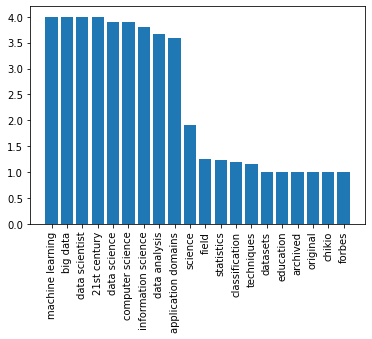

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Há, no entanto, uma maneira ainda melhor de visualizar as frequências de palavras - utilizando **Word Cloud**. Precisaremos instalar outra biblioteca para criar o word cloud a partir da nossa lista de palavras-chave.


In [71]:
!{sys.executable} -m pip install wordcloud

O objeto `WordCloud` é responsável por receber ou texto original, ou uma lista pré-computada de palavras com as suas frequências, e devolve uma imagem, que pode então ser exibida usando `matplotlib`:


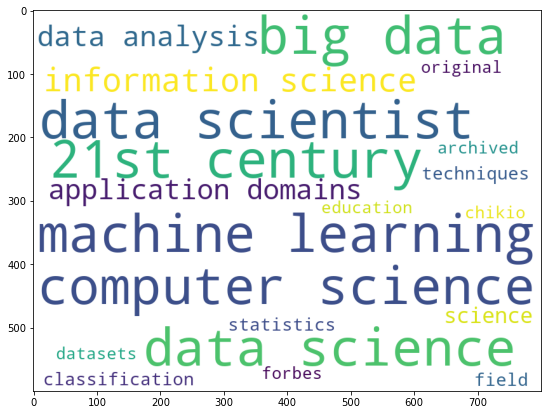

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Podemos também passar o texto original para `WordCloud` - vamos ver se conseguimos obter um resultado semelhante:


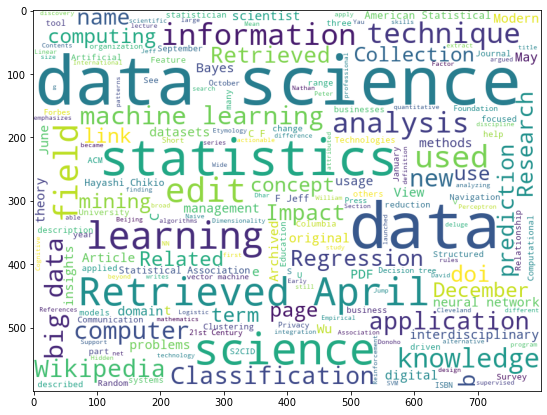

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Pode ver que a nuvem de palavras agora parece mais impressionante, mas também contém muito ruído (por exemplo, palavras não relacionadas como `Retrieved on`). Além disso, obtemos menos palavras-chave compostas por duas palavras, como *data scientist* ou *computer science*. Isto deve-se ao facto de o algoritmo RAKE fazer um trabalho muito melhor na seleção de boas palavras-chave a partir do texto. Este exemplo ilustra a importância do pré-processamento e limpeza de dados, pois uma visão clara no final permitirá que tomemos decisões mais acertadas.

Neste exercício, percorremos um processo simples de extração de algum significado de um texto da Wikipédia, na forma de palavras-chave e nuvem de palavras. Este exemplo é bastante simples, mas demonstra bem todos os passos típicos que um cientista de dados seguirá ao trabalhar com dados, desde a aquisição de dados até à visualização.

No nosso curso, discutiremos todos esses passos em detalhe.



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução automática [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automáticas podem conter erros ou imprecisões. O documento original na sua língua nativa deve ser considerado a fonte oficial. Para informações críticas, recomenda-se a tradução profissional realizada por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações incorretas resultantes do uso desta tradução.
